In [436]:
import py3Dmol 
import copy 
from rdkit import Chem 
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem import AllChem, TorsionFingerprints
from rdkit.Chem import rdBase
from rdkit.Chem import rdMolAlign 
from rdkit.Chem import rdMolDescriptors
import os 
import sys
from rdkit.Chem import PandasTools 
from rdkit import RDConfig

In [437]:
p = AllChem.ETKDGv2()
p.verbose = True 

In [438]:
path1 = '/Users/mariochiaparini/Desktop/Conformer3D_CID_11776.sdf'
path2 = '/Users/mariochiaparini/Desktop/new.sdf'

In [439]:
suppl = Chem.SDMolSupplier(path1)
w = Chem.SDWriter(path2)
for m in suppl:
    number = m.GetProp('_Name')
    m.SetProp('ID', number)
    w.write(m)
w.flush
w.close

<bound method close of <rdkit.Chem.rdmolfiles.SDWriter object at 0x7f80580e2400>>

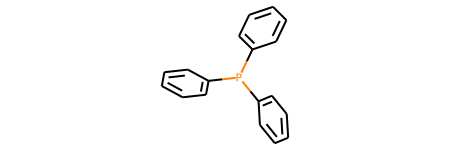

In [440]:
m

In [441]:
for mol in suppl:
    print(mol.GetNumBonds())
    print(mol.GetNumConformers())
    print(mol.GetNumHeavyAtoms())

21
1
19


In [442]:
m1 = Chem.AddHs(m)
AllChem.EmbedMolecule(m1)

0

In [443]:
AllChem.MMFFOptimizeMolecule(m1)

0

In [444]:
conformerid = AllChem.EmbedMultipleConfs(m1, numConfs=20)

In [445]:
len(conformerid)

20

In [446]:
rmslist = []
AllChem.AlignMolConformers(m1, RMSlist=rmslist)

In [447]:
len(rmslist)

19

In [448]:
rmslist

[1.5197267340362484,
 1.655339731580466,
 1.5909098537046904,
 1.7553477328014646,
 2.335653674135474,
 2.4017933828448217,
 2.45957934232288,
 2.036332906784598,
 2.1534403677940377,
 1.8399496512463092,
 2.50130709591535,
 1.8773502318339739,
 2.146271147008432,
 2.548065737370521,
 1.8598088828597437,
 1.5968414150256283,
 2.1374408519656325,
 2.034274043489181,
 1.164164829699238]

In [449]:
rms = AllChem.GetConformerRMS(m1, 2, 19, prealigned=True)

In [450]:
rms

1.9151896049399253

In [451]:
from rdkit.Chem import PyMol

In [464]:
res = AllChem.MMFFOptimizeMoleculeConfs(m1)
for cid in conformerid: AllChem.MMFFOptimizeMolecule(m1,confId=cid)

In [467]:
res

[(0, 65.58462874532262),
 (0, 65.5846287492821),
 (0, 65.58462877360023),
 (0, 65.58462874849148),
 (0, 65.58462888081839),
 (0, 65.58462874402774),
 (0, 65.58462907789016),
 (0, 65.5846288701803),
 (0, 65.58462874393368),
 (0, 65.58462878543664),
 (0, 65.58462882998072),
 (0, 65.58462877832163),
 (0, 65.5846287282503),
 (0, 65.58462874491129),
 (0, 65.58462875288171),
 (0, 65.5846288013439),
 (0, 65.58462875554932),
 (0, 65.58463155808434),
 (0, 65.58462878607999),
 (0, 65.58462876853787)]

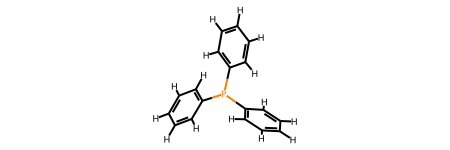

In [454]:
m1

In [455]:
view = py3Dmol.view()
from ipywidgets import interact,fixed,IntSlider
import ipywidgets

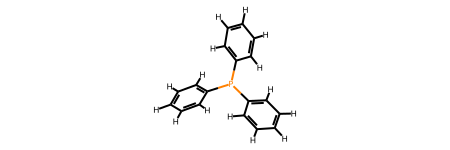

In [463]:
m1

## Conformer Generation with ETKDG

In [457]:
parameters = AllChem.ETKDG()

In [468]:
AllChem.EmbedMultipleConfs(m1, numConfs = 200 , params = parameters)

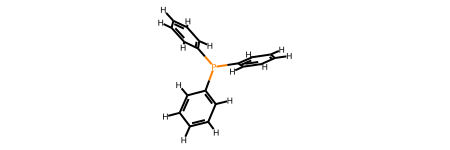

In [469]:
m1

In [470]:
from ipywidgets import interact, interactive, fixed

In [471]:
def drawit(m,p,confId=-1):
    mb = Chem.MolToMolBlock(m,confId=confId)
    p.removeAllModels()
    p.addModel(mb,'sdf')
    p.setStyle({'stick':{}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()
    return p.show()

In [472]:
p = py3Dmol.view(width=400,height=400)
interact(drawit, m=fixed(m1),p=fixed(p),confId=(0,m1.GetNumConformers()-1));

interactive(children=(IntSlider(value=0, description='confId', max=199), Output()), _dom_classes=('widget-inte…